In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
##Independent Features
X=pd.DataFrame(iris['data'],columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [7]:
##Dependent Features
Y=pd.DataFrame(iris['target'])
Y.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

Testing data is used to determine the performance of the trained model, whereas training data is used to train the machine learning model. Training data is the power that supplies the model in machine learning, it is larger than testing data.

used to assess the progress and efficiency of your algorithms’ training as well as to modify or optimize them for better results.

In [8]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

#No normalization required in decision tree

## C5.0 Decision Tree

In [9]:
##Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


In [10]:
treeclassifier=DecisionTreeClassifier(criterion='entropy')

In [11]:
treeclassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.375, 0.9375, 'x[2] <= 2.45\nentropy = 1.582\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.25, 0.8125, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.875, 'True  '),
 Text(0.5, 0.8125, 'x[2] <= 4.75\nentropy = 0.996\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4375, 0.875, '  False'),
 Text(0.25, 0.6875, 'x[3] <= 1.65\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.5625, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.6875, 'x[2] <= 5.15\nentropy = 0.426\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.625, 0.5625, 'x[3] <= 1.85\nentropy = 0.787\nsamples = 17\nvalue = [0, 4, 13]'),
 Text(0.5, 0.4375, 'x[1] <= 3.05\nentropy = 0.971\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(0.375, 0.3125, 'x[3] <= 1.75\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.25, 0.1875, 'x[3] <= 1.55\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.125, 0.06

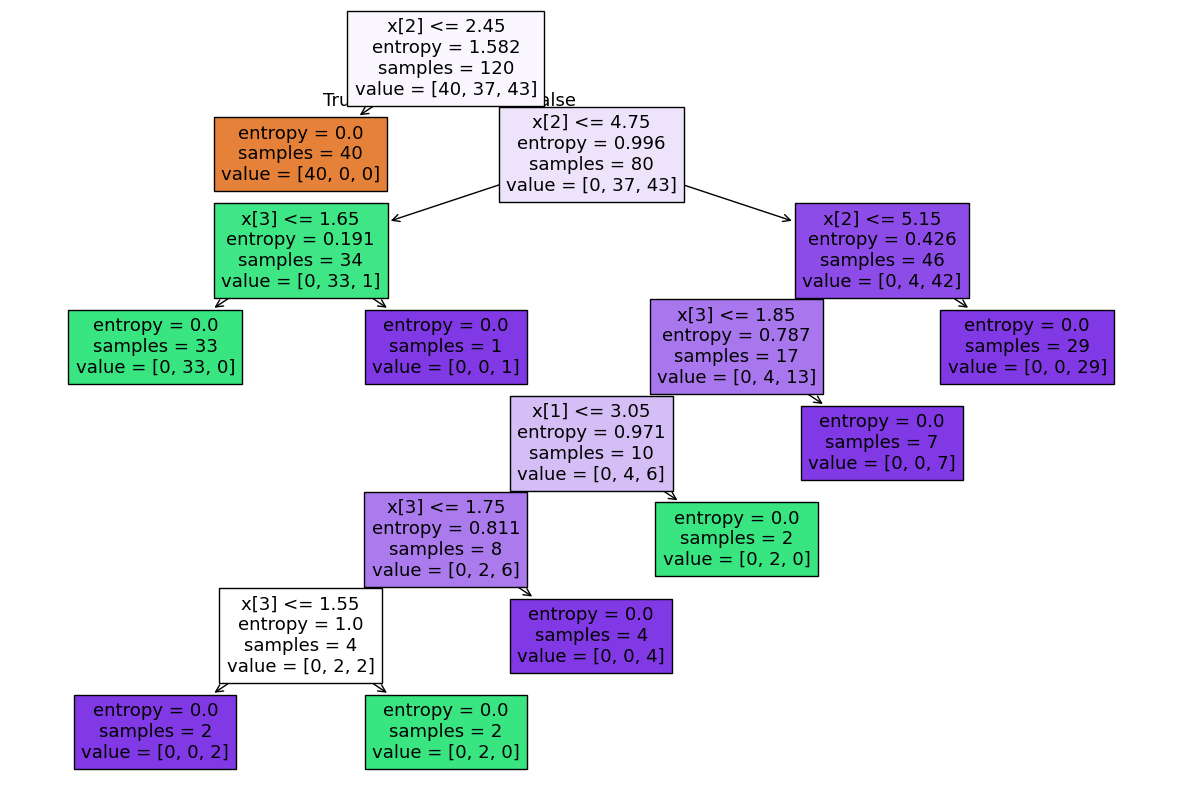

In [12]:
##Visualizing the Decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [14]:
y1_pred=treeclassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
print(accuracy_score(Y_test,y1_pred))
print(confusion_matrix(Y_test,y1_pred))
print(f1_score(Y_test,y1_pred,average='weighted'))
print(recall_score(Y_test,y1_pred,average='weighted'))
print(precision_score(Y_test,y1_pred,average='weighted'))


0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
0.9347222222222221
0.9333333333333333
0.9481481481481481


## Random Forest Classifier

It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition.

This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.

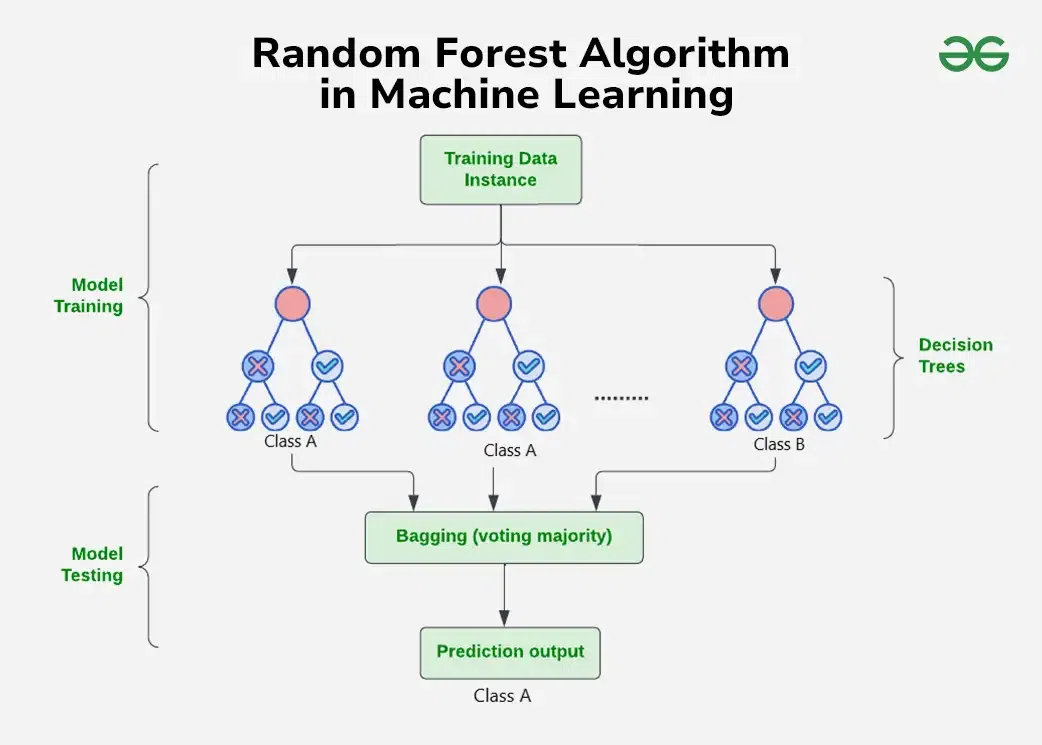

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest=RandomForestClassifier(criterion='gini',n_estimators=100)

In [19]:
random_forest.fit(X_train,Y_train)

d:\code\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [22]:
y_pred=random_forest.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print("F1_Score",f1_score(Y_test,y_pred,average='weighted'))
print("recall_score",recall_score(Y_test,y_pred,average='weighted'))
print("Precision",precision_score(Y_test,y_pred,average='weighted'))

0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
F1_Score 0.9671111111111111
recall_score 0.9666666666666667
Precision 0.9708333333333333
